# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

study_summary = pd.merge(study_results, mouse_metadata, how ="left", on = "Mouse ID")
study_summary
# Display the data table for preview
study_summary.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count= study_summary["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = study_summary[study_summary.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

duplicate_mouse_ids


array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = study_summary[study_summary['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by it ID
cleaned_study_summary = study_summary.drop_duplicates(subset=['Mouse ID'], keep='first')
cleaned_study_summary.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = cleaned_study_summary['Mouse ID'].nunique()
cleaned_mouse_count

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_grouped = cleaned_study_summary.groupby('Drug Regimen')

summary_stats = regimen_grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats =summary_stats.rename(columns={
    'mean':'Mean Tumor Volume',
    'median':'Median Tumor Volume',
    'medea':'Median Tumor Volume',
    'var':'Tumor volume Variance',
    'std':'Tumor volume STD.DEV',
    'sem':'Tumor volume STD.Err'
})
summary_stats




,Mean Tumor Volume,Median Tumor Volume,Tumor volume Variance,Tumor volume STD.DEV,Tumor volume STD.Err
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_study_summary.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])\
    .rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


## Bar and Pie Charts

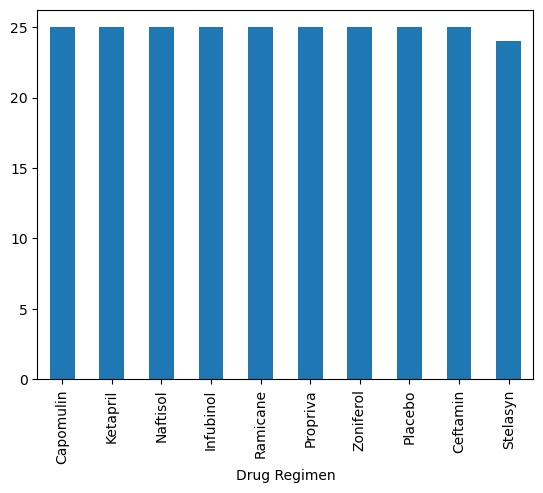

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_study_summary['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar')
plt.show()

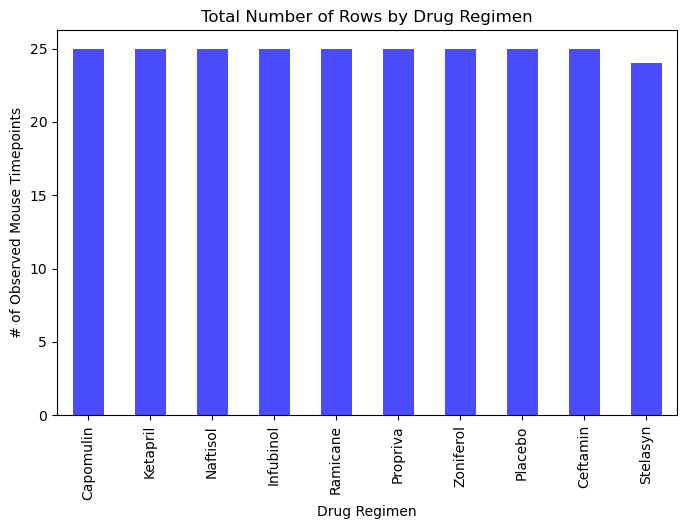

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_study_summary['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', color='b', alpha=0.7, figsize=(8, 5))
plt.title('Total Number of Rows by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

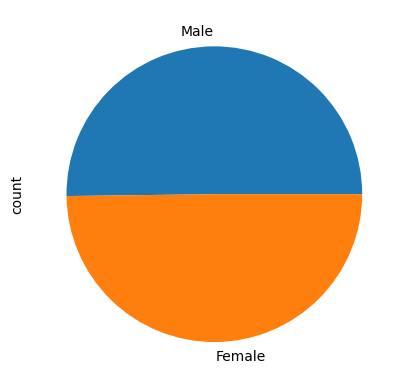

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_study_summary['Sex'].value_counts()
gender_counts.plot(kind='pie')
plt.show()

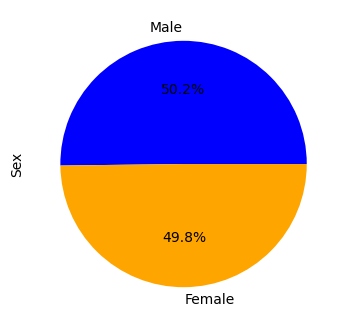

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = cleaned_study_summary['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['b', 'orange'], startangle=0, figsize=(4, 4))
plt.ylabel('Sex') 
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_study_summary.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(last_timepoints, cleaned_study_summary, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_volumes = final_tumor_volumes[final_tumor_volumes['Drug Regimen'].isin(selected_regimens)]
final_tumor_volumes[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volumes.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.0,0,Infubinol,Female,20,23
1,a251,0,45.0,0,Infubinol,Female,21,25
3,a275,0,45.0,0,Ceftamin,Female,20,28
6,a411,0,45.0,0,Ramicane,Male,3,22
7,a444,0,45.0,0,Ramicane,Female,10,25


In [26]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for treatment in treatments:
    tumor_volumes = cleaned_study_summary.loc[cleaned_study_summary['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    # Locate the rows which contain mice on each drug and get the tumor volumes

    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)
    
    
    # add subset 

    
    # Determine outliers using upper and lower bounds

 print(f"Potential outliers for {treatment}:")
    if potential_outliers.empty:
        print("No potential outliers found.")
    else:
        print(potential_outliers)
    print()


IndentationError: unexpected indent (701959818.py, line 11)

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Distribution for Each Treatment Group')
plt.show()


NameError: name 'tumor_vol_data' is not defined

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
